In [23]:
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('IRIS.csv')

In [4]:
df.drop(['sepal_length', 'sepal_width'], axis= 'columns', inplace=True)

In [5]:
df

,petal_length,petal_width,species
0,1.4,0.2,Iris-setosa
1,1.4,0.2,Iris-setosa
2,1.3,0.2,Iris-setosa
3,1.5,0.2,Iris-setosa
4,1.4,0.2,Iris-setosa
...,...,...,...
145,5.2,2.3,Iris-virginica
146,5.0,1.9,Iris-virginica
147,5.2,2.0,Iris-virginica
148,5.4,2.3,Iris-virginica


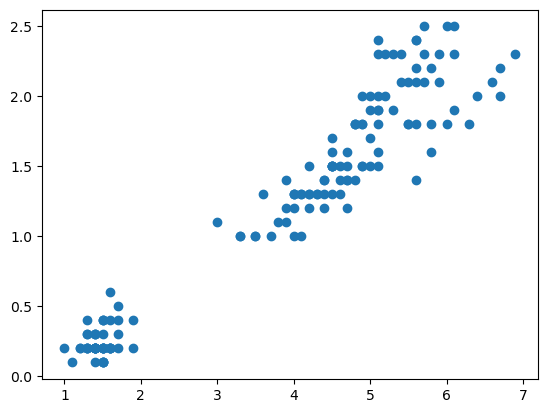

In [6]:
plt.scatter(df['petal_length'], df['petal_width'])

In [7]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [11]:
y_predicted = km.fit_predict(df[['petal_length','petal_width']])
y_predicted

C:\Users\hnikolov\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\hnikolov\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [15]:
df['cluster'] = y_predicted
df

,petal_length,petal_width,species,cluster
0,1.4,0.2,Iris-setosa,1
1,1.4,0.2,Iris-setosa,1
2,1.3,0.2,Iris-setosa,1
3,1.5,0.2,Iris-setosa,1
4,1.4,0.2,Iris-setosa,1
...,...,...,...,...
145,5.2,2.3,Iris-virginica,2
146,5.0,1.9,Iris-virginica,2
147,5.2,2.0,Iris-virginica,2
148,5.4,2.3,Iris-virginica,2


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


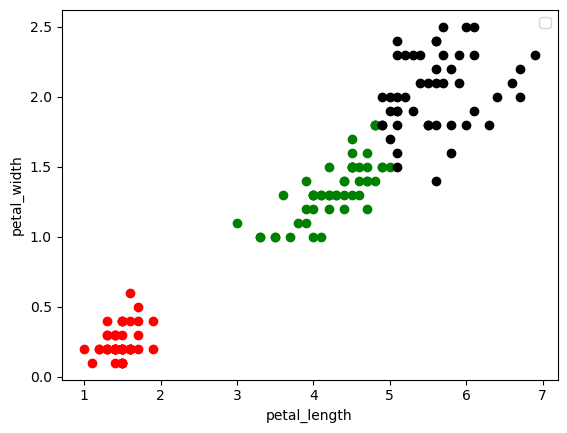

In [16]:
df1 = df[df['cluster'] == 0]
df2 = df[df['cluster'] == 1]
df3 = df[df['cluster'] == 2]

plt.scatter(df1['petal_length'], df1['petal_width'], color = 'green')
plt.scatter(df2['petal_length'], df2['petal_width'], color = 'red')
plt.scatter(df3['petal_length'], df3['petal_width'], color = 'black')

plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.legend()

In [36]:
x = np.array(df['petal_length'])
x = x.reshape(-1, 1)
scaler = MinMaxScaler()
scaler.fit(x)
df['petal_length_scaled'] = scaler.transform(x)

y = np.array(df['petal_width'])
y = y.reshape(-1, 1)
scaler.fit(y)
df['petal_petal_width_scaled'] = scaler.transform(y)

df_plot = df.drop(['petal_length','petal_width', 'x'] , axis='columns')

In [37]:
df_plot

,species,cluster,petal_length_scaled,petal_petal_width_scaled
0,Iris-setosa,1,0.067797,0.041667
1,Iris-setosa,1,0.067797,0.041667
2,Iris-setosa,1,0.050847,0.041667
3,Iris-setosa,1,0.084746,0.041667
4,Iris-setosa,1,0.067797,0.041667
...,...,...,...,...
145,Iris-virginica,2,0.711864,0.916667
146,Iris-virginica,2,0.677966,0.750000
147,Iris-virginica,2,0.711864,0.791667
148,Iris-virginica,2,0.745763,0.916667


In [39]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df_plot[['petal_length_scaled', 'petal_petal_width_scaled']])
y_predicted

C:\Users\hnikolov\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\hnikolov\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [41]:
df_plot['cluster'] = y_predicted
df_plot

,species,cluster,petal_length_scaled,petal_petal_width_scaled
0,Iris-setosa,1,0.067797,0.041667
1,Iris-setosa,1,0.067797,0.041667
2,Iris-setosa,1,0.050847,0.041667
3,Iris-setosa,1,0.084746,0.041667
4,Iris-setosa,1,0.067797,0.041667
...,...,...,...,...
145,Iris-virginica,0,0.711864,0.916667
146,Iris-virginica,0,0.677966,0.750000
147,Iris-virginica,0,0.711864,0.791667
148,Iris-virginica,0,0.745763,0.916667


In [48]:
km.cluster_centers_

array([[0.7740113 , 0.81510417],
       [0.07864407, 0.06      ],
       [0.55867014, 0.51041667]])

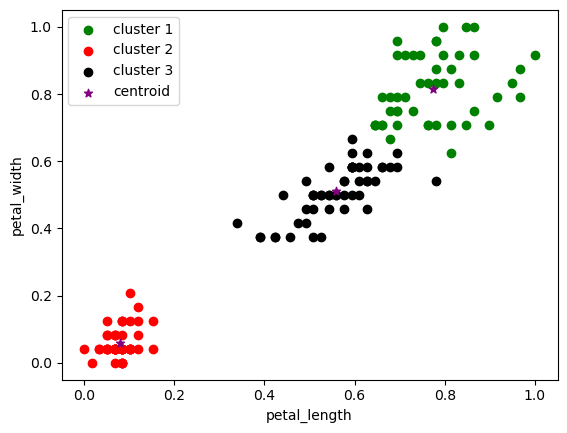

In [51]:
df1 = df_plot[df_plot['cluster'] == 0]
df2 = df_plot[df_plot['cluster'] == 1]
df3 = df_plot[df_plot['cluster'] == 2]

plt.scatter(df1['petal_length_scaled'], df1['petal_petal_width_scaled'], color = 'green', label = 'cluster 1')
plt.scatter(df2['petal_length_scaled'], df2['petal_petal_width_scaled'], color = 'red', label = 'cluster 2')
plt.scatter(df3['petal_length_scaled'], df3['petal_petal_width_scaled'], color = 'black', label = 'cluster 3')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color = 'purple', marker='*', label='centroid')

plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.legend()

In [52]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km= KMeans(n_clusters=k)
    km.fit(df_plot[['petal_length_scaled', 'petal_petal_width_scaled']])
    sse.append(km.inertia_)

C:\Users\hnikolov\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\hnikolov\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\hnikolov\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\hnikolov\AppData\Local\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chun

In [53]:
sse

[28.391514358368713,
 5.179687509974784,
 1.7050986081225126,
 1.1621031930971282,
 0.8570856553216398,
 0.6830340775618187,
 0.5683512655008138,
 0.48903237532185284,
 0.417386183759112]

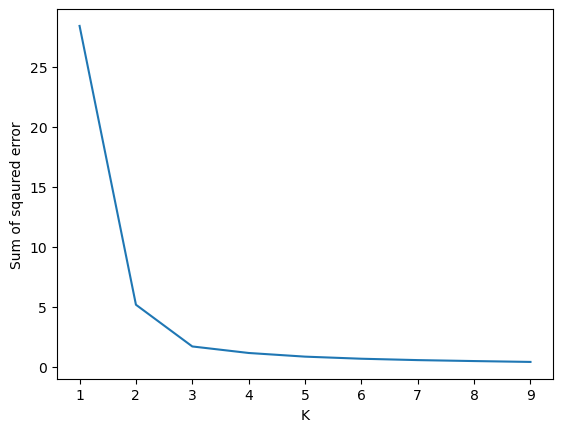

In [54]:
plt.xlabel('K')
plt.ylabel('Sum of sqaured error')
plt.plot(k_rng, sse)